In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import skfuzzy as fuzz
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.cluster import AgglomerativeClustering

sns.set()

data = pd.read_csv('flame.txt', sep="\t", header=None)
data_to_normalize = data.iloc[:, :2]
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data_to_normalize)
normalized_df = pd.DataFrame(normalized_data, columns=['c1_norm', 'c2_norm'])
normalized_df

,c1_norm,c2_norm
0,0.098540,1.000000
1,0.062044,0.913858
2,0.065693,0.659176
3,0.025547,0.644195
4,0.000000,0.591760
...,...,...
235,0.510949,0.880150
236,0.510949,0.838951
237,0.478102,0.853933
238,0.467153,0.951311


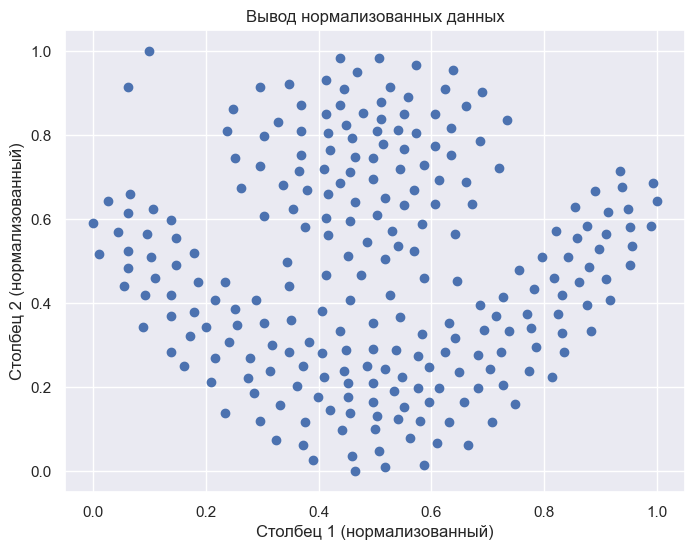

In [2]:
plt.figure(figsize=(8, 6))
plt.scatter(normalized_df['c1_norm'], normalized_df['c2_norm'])
plt.title('Вывод нормализованных данных')
plt.xlabel('Столбец 1 (нормализованный)')
plt.ylabel('Столбец 2 (нормализованный)')
plt.grid(True)
plt.show()

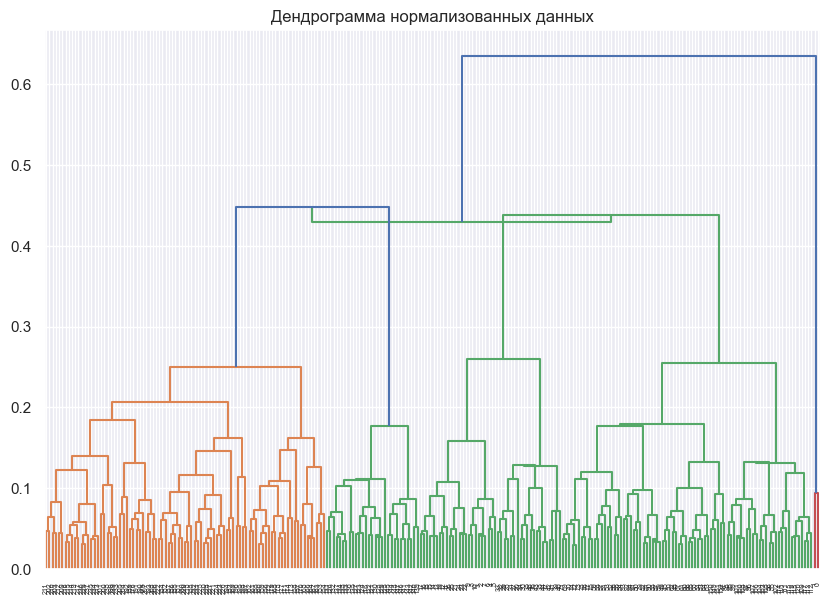

In [3]:
linked_normalized = linkage(normalized_df, method='centroid', metric='euclidean')
plt.figure(figsize=(10, 7))
dendrogram(linked_normalized,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Дендрограмма нормализованных данных')
plt.show()

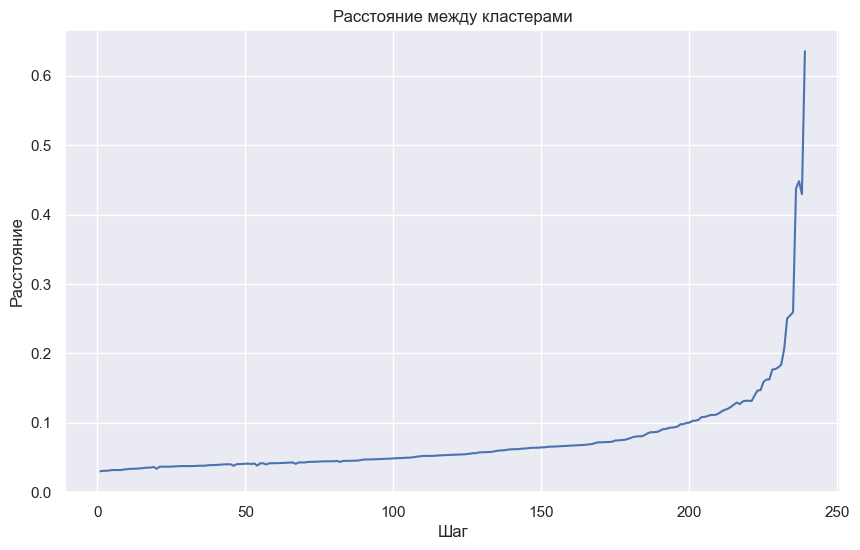

In [124]:
detect = linkage(normalized_data, method='centroid')

step_numbers = range(1, len(detect) + 1)
distances = detect[:, 2]

plt.figure(figsize=(10, 6))
plt.plot(step_numbers, distances)
plt.title('Расстояние между кластерами')
plt.xlabel('Шаг')
plt.ylabel('Расстояние')
plt.grid(True)
plt.show()

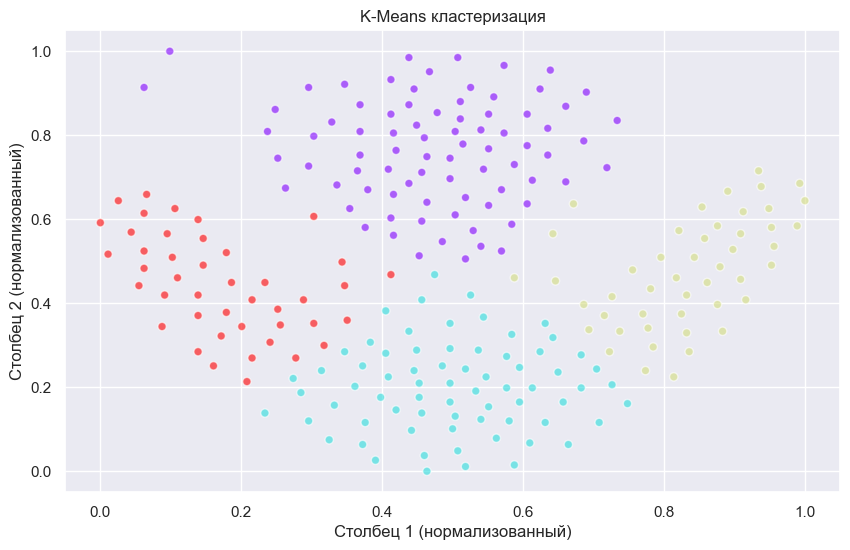

In [128]:
kmeans = KMeans(n_clusters=4, n_init=10)
kmeans.fit(normalized_data)
kmeans_labels = kmeans.labels_

plt.figure(figsize=(10, 6))
plt.scatter(normalized_data[:, 0], normalized_data[:, 1], c=kmeans_labels, cmap='rainbow', alpha=0.6, edgecolors='w')
plt.title("K-Means кластеризация")
plt.xlabel('Столбец 1 (нормализованный)')
plt.ylabel('Столбец 2 (нормализованный)')
plt.show()

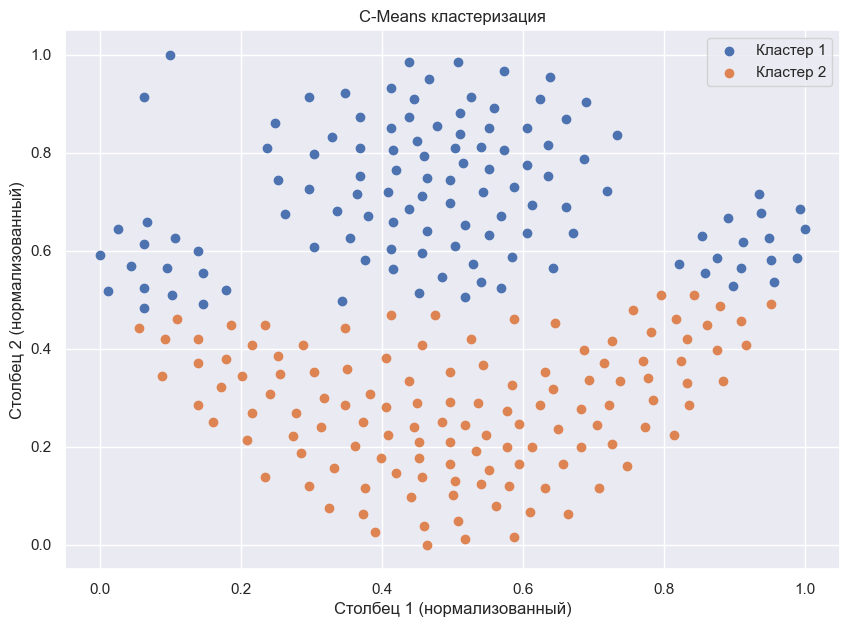

In [129]:
c = 2
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    normalized_data.T, c, m=1.5, error=0.005, maxiter=1000, init=None)
cluster_membership = np.argmax(u, axis=0)
plt.figure(figsize=(10, 7))
for j in range(c):
    plt.scatter(normalized_data[cluster_membership == j, 0], 
                normalized_data[cluster_membership == j, 1], 
                label=f'Кластер {j+1}')
plt.xlabel('Столбец 1 (нормализованный)')
plt.ylabel('Столбец 2 (нормализованный)')
plt.title('C-Means кластеризация')
plt.legend()
plt.show()

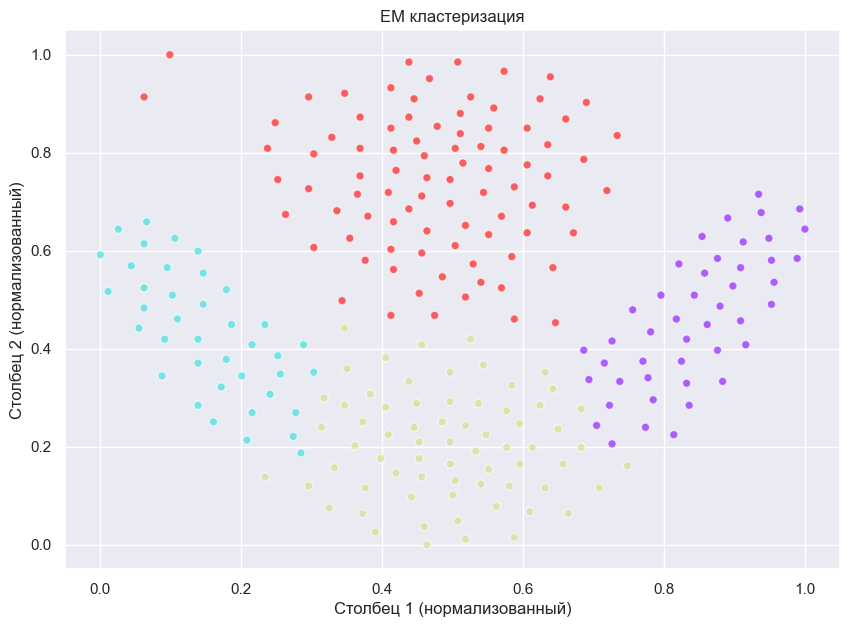

In [117]:
gmm = GaussianMixture(n_components=4, random_state=0)
gmm.fit(normalized_data)

gmm_labels = gmm.predict(normalized_data)

plt.figure(figsize=(10, 7))
plt.scatter(normalized_data[:, 0], normalized_data[:, 1], c=gmm_labels, cmap='rainbow', alpha=0.6, edgecolors='w')
plt.title("EM кластеризация")
plt.xlabel('Столбец 1 (нормализованный)')
plt.ylabel('Столбец 2 (нормализованный)')
plt.show()

Выводы:
Пороговое значение для дендрограммы получено из расстояния между кластерами и равно 0.3. Дендрограмма представлена 4 кластерами.
Были опробованы также и различные методы для кластеризации для 2 кластераов, однако, точной кластеризации не удалось получить в виду шума и близкого расположения кластеров друг к друга.
Для количества кластеров = 4 наиболее точным методом оказалась EM кластеризация.
Тип кластеров: скученные.